<a href="https://colab.research.google.com/github/Thibault13320/machine-learning-zoomcamp/blob/main/02-regression/homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#Setting up the environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Download the dataset
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv

--2025-10-04 17:33:08--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.1s    

2025-10-04 17:33:09 (5.80 MB/s) - ‘car_fuel_efficiency.csv’ saved [874188/874188]



In [6]:
# Load the dataset
df = pd.read_csv('car_fuel_efficiency.csv')

In [7]:
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())


Dataset loaded successfully!
Dataset shape: (9704, 11)

First few rows:
   engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                  170            3.0       159.0     3413.433759   
1                  130            5.0        97.0     3149.664934   
2                  170            NaN        78.0     3079.038997   
3                  220            4.0         NaN     2542.392402   
4                  210            1.0       140.0     3460.870990   

   acceleration  model_year  origin fuel_type         drivetrain  num_doors  \
0          17.7        2003  Europe  Gasoline    All-wheel drive        0.0   
1          17.8        2007     USA  Gasoline  Front-wheel drive        0.0   
2          15.1        2018  Europe  Gasoline  Front-wheel drive        0.0   
3          20.2        2009     USA    Diesel    All-wheel drive        2.0   
4          14.4        2009  Europe  Gasoline    All-wheel drive        2.0   

   fuel_efficiency_mpg  
0            

In [8]:
print("\n" + "="*50)
print("PREPARING THE DATASET")
print("="*50)


PREPARING THE DATASET


In [9]:
# Select only the required columns
columns_to_use = ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
df = df[columns_to_use]

print(f"Selected columns: {columns_to_use}")
print(f"New dataset shape: {df.shape}")
print("\nDataset info:")
print(df.info())


Selected columns: ['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']
New dataset shape: (9704, 5)

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9704 entries, 0 to 9703
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   engine_displacement  9704 non-null   int64  
 1   horsepower           8996 non-null   float64
 2   vehicle_weight       9704 non-null   float64
 3   model_year           9704 non-null   int64  
 4   fuel_efficiency_mpg  9704 non-null   float64
dtypes: float64(3), int64(2)
memory usage: 379.2 KB
None


In [10]:
print("\n" + "="*50)
print("EDA - Fuel Efficiency Distribution")
print("="*50)

print("\nFuel efficiency statistics:")
print(df['fuel_efficiency_mpg'].describe())


EDA - Fuel Efficiency Distribution

Fuel efficiency statistics:
count    9704.000000
mean       14.985243
std         2.556468
min         6.200971
25%        13.267459
50%        15.006037
75%        16.707965
max        25.967222
Name: fuel_efficiency_mpg, dtype: float64


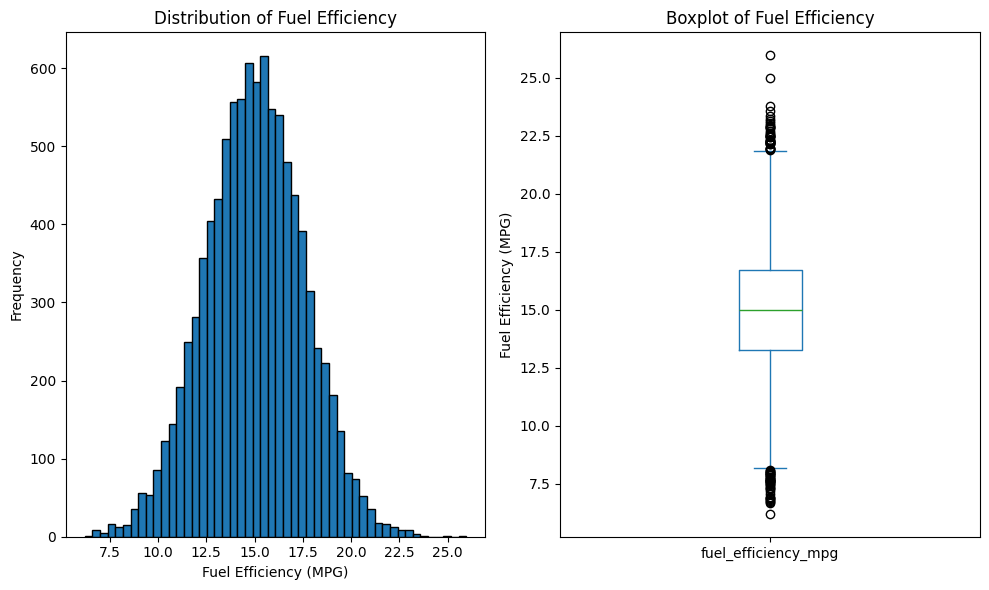


Does it have a long tail? Look at the histogram above.
If the distribution is skewed with values extending far to one side, it has a long tail.


In [11]:
# Plot distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.hist(df['fuel_efficiency_mpg'], bins=50, edgecolor='black')
plt.xlabel('Fuel Efficiency (MPG)')
plt.ylabel('Frequency')
plt.title('Distribution of Fuel Efficiency')

plt.subplot(1, 2, 2)
df['fuel_efficiency_mpg'].plot(kind='box')
plt.ylabel('Fuel Efficiency (MPG)')
plt.title('Boxplot of Fuel Efficiency')

plt.tight_layout()
plt.show()

print("\nDoes it have a long tail? Look at the histogram above.")
print("If the distribution is skewed with values extending far to one side, it has a long tail.")

In [12]:
print("\n" + "="*50)
print("Question 1: Column with missing values")
print("="*50)

missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)

column_with_missing = missing_values[missing_values > 0].index[0]
print(f"\nAnswer: '{column_with_missing}' has {missing_values[column_with_missing]} missing values")


Question 1: Column with missing values

Missing values per column:
engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

Answer: 'horsepower' has 708 missing values


In [13]:
print("\n" + "="*50)
print("Question 2: Median of horsepower")
print("="*50)

median_horsepower = df['horsepower'].median()
print(f"Median (50th percentile) of horsepower: {median_horsepower}")


Question 2: Median of horsepower
Median (50th percentile) of horsepower: 149.0


In [14]:
print("\n" + "="*50)
print("PREPARE AND SPLIT THE DATASET")
print("="*50)


PREPARE AND SPLIT THE DATASET


In [15]:
# Shuffle the dataset with seed 42
np.random.seed(42)
n = len(df)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)

print(f"Dataset shuffled with seed 42")

Dataset shuffled with seed 42


In [16]:
# Split: 60% train, 20% validation, 20% test
n_train = int(0.6 * n)
n_val = int(0.2 * n)
n_test = n - n_train - n_val

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

print(f"Train set: {len(df_train)} samples")
print(f"Validation set: {len(df_val)} samples")
print(f"Test set: {len(df_test)} samples")

Train set: 5822 samples
Validation set: 1940 samples
Test set: 1942 samples


In [17]:
# Separate features and target
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [18]:
print("\n" + "="*50)
print("Question 3: Fill missing values - 0 vs mean")
print("="*50)

def train_linear_regression(X, y):
    """Train linear regression without regularization"""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]

def rmse(y_true, y_pred):
    """Calculate RMSE"""
    se = (y_true - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def predict(X, w0, w):
    """Make predictions"""
    return w0 + X.dot(w)


Question 3: Fill missing values - 0 vs mean


In [19]:
# Option 1: Fill with 0
print("\nOption 1: Fill missing values with 0")
X_train_zero = df_train.fillna(0).values
X_val_zero = df_val.fillna(0).values

w0_zero, w_zero = train_linear_regression(X_train_zero, y_train)
y_pred_zero = predict(X_val_zero, w0_zero, w_zero)
rmse_zero = rmse(y_val, y_pred_zero)
print(f"RMSE with 0: {round(rmse_zero, 2)}")


Option 1: Fill missing values with 0
RMSE with 0: 0.52


In [20]:
# Option 2: Fill with mean (computed on training set only!)
print("\nOption 2: Fill missing values with mean")
mean_value = df_train[column_with_missing].mean()
print(f"Mean of '{column_with_missing}' from training set: {mean_value:.2f}")

X_train_mean = df_train.fillna(mean_value).values
X_val_mean = df_val.fillna(mean_value).values

w0_mean, w_mean = train_linear_regression(X_train_mean, y_train)
y_pred_mean = predict(X_val_mean, w0_mean, w_mean)
rmse_mean = rmse(y_val, y_pred_mean)
print(f"RMSE with mean: {round(rmse_mean, 2)}")


Option 2: Fill missing values with mean
Mean of 'horsepower' from training set: 149.54
RMSE with mean: 0.46


In [21]:
# Compare
print("\n" + "-"*50)
print("COMPARISON:")
print(f"RMSE with 0:    {round(rmse_zero, 2)}")
print(f"RMSE with mean: {round(rmse_mean, 2)}")

if round(rmse_zero, 2) < round(rmse_mean, 2):
    print("Answer: With 0 gives better RMSE")
elif round(rmse_zero, 2) > round(rmse_mean, 2):
    print("Answer: With mean gives better RMSE")
else:
    print("Answer: Both are equally good")


--------------------------------------------------
COMPARISON:
RMSE with 0:    0.52
RMSE with mean: 0.46
Answer: With mean gives better RMSE


In [22]:
print("\n" + "="*50)
print("Question 4: Regularized linear regression")
print("="*50)

def train_linear_regression_reg(X, y, r=0.0):
    """Train regularized linear regression"""
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)

    return w[0], w[1:]


Question 4: Regularized linear regression


In [23]:
# Fill with 0
X_train_zero = df_train.fillna(0).values
X_val_zero = df_val.fillna(0).values

In [24]:
# Try different values of r
r_values = [0, 0.01, 0.1, 1, 5, 10, 100]
rmse_scores = []

print("\nTrying different r values:")
for r in r_values:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = predict(X_val_zero, w0, w)
    score = rmse(y_val, y_pred)
    rmse_scores.append(score)
    print(f"r = {r:6.2f} | RMSE = {round(score, 2)}")


Trying different r values:
r =   0.00 | RMSE = 0.52
r =   0.01 | RMSE = 0.52
r =   0.10 | RMSE = 0.52
r =   1.00 | RMSE = 0.52
r =   5.00 | RMSE = 0.52
r =  10.00 | RMSE = 0.52
r = 100.00 | RMSE = 0.52


In [25]:
# Find best r
best_idx = np.argmin(rmse_scores)
best_r = r_values[best_idx]
best_rmse = rmse_scores[best_idx]

print("\n" + "-"*50)
print(f"Best r: {best_r}")
print(f"Best RMSE: {round(best_rmse, 2)}")


--------------------------------------------------
Best r: 0.01
Best RMSE: 0.52


In [26]:
print("\n" + "="*50)
print("Question 5: Effect of random seed")
print("="*50)



Question 5: Effect of random seed


In [31]:
# Load original data fresh
df_original = pd.read_csv('car_fuel_efficiency.csv')
df_q5 = df_original[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']].copy()

n = len(df_q5)
n_train = int(0.6 * n)
n_val = int(0.2 * n)

In [33]:
# RESET the list
rmse_scores_seeds = []

seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

print("\nTrying different seeds:")
for seed in seeds:
    np.random.seed(seed)
    idx = np.arange(n)
    np.random.shuffle(idx)

    df_shuffled = df_q5.iloc[idx].reset_index(drop=True)

    df_train_s = df_shuffled.iloc[:n_train].copy()
    df_val_s = df_shuffled.iloc[n_train:n_train+n_val].copy()

    y_train_s = df_train_s['fuel_efficiency_mpg'].values
    y_val_s = df_val_s['fuel_efficiency_mpg'].values

    del df_train_s['fuel_efficiency_mpg']
    del df_val_s['fuel_efficiency_mpg']

    X_train_s = df_train_s.fillna(0).values
    X_val_s = df_val_s.fillna(0).values

    w0, w = train_linear_regression(X_train_s, y_train_s)
    y_pred = predict(X_val_s, w0, w)
    score = rmse(y_val_s, y_pred)
    rmse_scores_seeds.append(score)

    print(f"Seed = {seed} | RMSE = {score:.3f}")



Trying different seeds:
Seed = 0 | RMSE = 0.521
Seed = 1 | RMSE = 0.522
Seed = 2 | RMSE = 0.523
Seed = 3 | RMSE = 0.516
Seed = 4 | RMSE = 0.511
Seed = 5 | RMSE = 0.529
Seed = 6 | RMSE = 0.532
Seed = 7 | RMSE = 0.510
Seed = 8 | RMSE = 0.515
Seed = 9 | RMSE = 0.513


In [34]:
# Calculate standard deviation
std_rmse = np.std(rmse_scores_seeds)

print("\n" + "-"*50)
print(f"Number of scores: {len(rmse_scores_seeds)}")
print(f"Standard deviation: {round(std_rmse, 3)}")
print(f"\nAnswer for Question 5: {round(std_rmse, 3)}")


--------------------------------------------------
Number of scores: 10
Standard deviation: 0.007

Answer for Question 5: 0.007


In [36]:
print("\n" + "="*50)
print("Question 6: Final model on test set")
print("="*50)



Question 6: Final model on test set


In [37]:
# Split with seed 9
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)
df_shuffled = df.iloc[idx].reset_index(drop=True)


In [38]:
# Split
df_train_final = df_shuffled.iloc[:n_train].copy()
df_val_final = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test_final = df_shuffled.iloc[n_train+n_val:].copy()

In [39]:
# Combine train and validation
df_train_val = pd.concat([df_train_final, df_val_final]).reset_index(drop=True)

y_train_val = df_train_val['fuel_efficiency_mpg'].values
y_test_final = df_test_final['fuel_efficiency_mpg'].values

del df_train_val['fuel_efficiency_mpg']
del df_test_final['fuel_efficiency_mpg']


In [40]:
# Fill with 0
X_train_val = df_train_val.fillna(0).values
X_test_final = df_test_final.fillna(0).values

In [41]:
# Train with r=0.001
w0_final, w_final = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred_final = predict(X_test_final, w0_final, w_final)
rmse_final = rmse(y_test_final, y_pred_final)

print(f"Combined train+validation set size: {len(df_train_val)}")
print(f"Test set size: {len(df_test_final)}")
print(f"Model trained with r=0.001")
print(f"\nRMSE on test set: {round(rmse_final, 2)}")

Combined train+validation set size: 7762
Test set size: 1942
Model trained with r=0.001

RMSE on test set: 0.52


In [42]:
print("\n" + "="*70)
print("SUMMARY OF ANSWERS")
print("="*70)
print(f"Q1: Column with missing values: '{column_with_missing}'")
print(f"Q2: Median of horsepower: {median_horsepower}")
print(f"Q3: Better option: {'With 0' if rmse_zero < rmse_mean else ('With mean' if rmse_mean < rmse_zero else 'Both equally good')} (RMSE: 0={round(rmse_zero, 2)}, mean={round(rmse_mean, 2)})")
print(f"Q4: Best r value: {best_r} (RMSE: {round(best_rmse, 2)})")
print(f"Q5: Standard deviation of RMSE: {round(std_rmse, 3)}")
print(f"Q6: RMSE on test set (seed=9, r=0.001): {round(rmse_final, 2)}")
print("="*70)


SUMMARY OF ANSWERS
Q1: Column with missing values: 'horsepower'
Q2: Median of horsepower: 149.0
Q3: Better option: With mean (RMSE: 0=0.52, mean=0.46)
Q4: Best r value: 0.01 (RMSE: 0.52)
Q5: Standard deviation of RMSE: 0.007
Q6: RMSE on test set (seed=9, r=0.001): 0.52
